In [1]:
import data_prep
import textrank
import evaluation
import cluster
import glob
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     /home/gusklezju@GU.GU.SE/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gusklezju@GU.GU.SE/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#path_to_data = "../CNN_corpus"
files = glob.glob("../CNN_corpus/*")

In [3]:
# read files into dataframes
texts_df, summaries_df = data_prep.get_data(files)

In [4]:
texts_df.head()
#summaries_df.head()

,filename,text_num,text
0,../CNN_corpus/train_266.bin,1,manchester united defender luke shaw could ret...
1,../CNN_corpus/train_266.bin,2,what do kylie minogue and the cancan girls at ...
2,../CNN_corpus/train_266.bin,3,a husband has been banned from having sex with...
3,../CNN_corpus/train_266.bin,4,a scathing new report ordered in the wake of t...
4,../CNN_corpus/train_266.bin,5,for miners working during the soviet regime i...


In [5]:
# check if data was read in correctly
data_prep.check_data(texts_df, summaries_df)

check complete


In [6]:
# get a random sample to test summarizer on
r_text, r_summary = data_prep.random_sample(texts_df, summaries_df)

file: ../CNN_corpus/test_002.bin
article: the thermometer reading mario balotelli shared on social media to prove he was too ill to play against blackburn on wednesday night will make no difference to brendan rodgers . liverpool s manager had already gone cold on the italian  concluding some time ago that he has no future at anfield . rodgers will admit he ignored the warnings about balotelli . he knew jose mourinho considered him  unmanageable  and he listened to the anecdotal evidence he received from the members of his staff who had encountered the troublesome striker during their time at manchester city . but rodgers rather hoped balotelli might be maturing with age  and he made the mistake of thinking he could succeed where others had failed in actually getting through to him . mario balotelli has no future at liverpool after manager brendan rodgers lost patience with the striker . rodgers will admit he ignored the warning signs but had hoped balotelli was maturing as he got older

In [7]:
# load pre-trained embeddings for textrank 
embs = textrank.get_embeddings("../glove.6B.100d.txt")

loaded embeddings


In [8]:
# summarize random sample with textrank
r_sum_textrank = textrank.get_summary(r_text, embs, 3)

in sturridge s absence rodgers told balotelli he needed a striker who would  press  at the point of liverpool s attack  who would play high up the field and in so doing set the pattern of liverpool s play . attempts to recruit other strikers  in particular alexis sanchez  had proved unsuccessful last summer and he was concerned that rickie lambert would not provide ample cover in a champions league season if daniel sturridge suffered further injury problems . the thermometer reading mario balotelli shared on social media to prove he was too ill to play against blackburn on wednesday night will make no difference to brendan rodgers . 


In [9]:
# summarize sample with cluster/skipthoughts
r_sum_cluster = cluster.get_summary(r_text, 3)

/usr/local/lib64/python3.7/site-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


balotelli  much to his manager s frustration  just would nt do it  in the misguided belief that he knew better . attempts to recruit other strikers  in particular alexis sanchez  had proved unsuccessful last summer and he was concerned that rickie lambert would not provide ample cover in a champions league season if daniel sturridge suffered further injury problems . ludogorets lrb a rrb drew 22  november 26  2014 reason  hamstring and groin injuries .


In [10]:
# original summary for comparison
r_summary

's mario balotelli missed liverpool s clash at blackburn due to illness . s s the striker has no future at anfield after brendan rodgers lost patience . s s the liverpool boss will concede he made a mistake in signing balotelli . s s read  robbie savage brands balotelli s absence at blackburn  pathetic  s s click here for all the latest liverpool news . s'

In [11]:
# calculate rouge score for textrank example
tr = evaluation.get_rouge(r_sum_textrank, r_summary)

{'rouge-1': {'f': 0.2705882306290658, 'p': 0.21495327102803738, 'r': 0.36507936507936506}, 'rouge-2': {'f': 0.047619042962018604, 'p': 0.03773584905660377, 'r': 0.06451612903225806}, 'rouge-l': {'f': 0.2601625970784587, 'p': 0.2, 'r': 0.37209302325581395}}


In [12]:
# calculate rouge score for cluster/skipthough example
cl= evaluation.get_rouge(r_sum_cluster, r_summary)

{'rouge-1': {'f': 0.10370369872592618, 'p': 0.09722222222222222, 'r': 0.1111111111111111}, 'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-l': {'f': 0.1308411166879205, 'p': 0.109375, 'r': 0.16279069767441862}}


In [13]:
# extract smaller datasets for evaluation (for efficiency/time reasons)
texts_s = texts_df[:10]
summaries_s = summaries_df[:10]

In [14]:
# calculate average score with textrank
tr_overall = evaluation.rouge_overall_textrank(texts_s, summaries_s, embs)

manchester united defender luke shaw could return to action on boxing day against newcastle united . manchester united defender luke shaw could return to action on boxing day against newcastle united . if shaw comes through the next few days unscathed he is line to figure at old trafford against newcastle next week . 
stunning  one of the custom made shoes created at maison clairvoy . by the 1960s  maison clairvoy had branched out into creating shoes for the theatrical world and today  theatre  cinema and even circuses account for 80 percent of the 400 pairs of shoes and boots the company makes every year . but while maison clairvoy still supplies shoes to the moulin rouge  it regularly makes shoes to order for filmmakers as well . 
judgment  a judge at the high court lrb pictured rrb in london said the man wanted his wife to come home so he could have sex with his two spouses on alternate days . he added   the right to family life is a qualified right and the evidence overwhelmingly s

In [15]:
# calculate average score with cluster/skipthought
cl_overall = evaluation.rouge_overall_cluster(texts_s, summaries_s)

/usr/local/lib64/python3.7/site-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


shaw injured his ankle in the 21 barclays premier league win at arsenal on november 22 and was expected to be out for between four and six weeks . manchester united defender luke shaw could return to action on boxing day against newcastle united . ashley young has done well in the left wingback position in shaw s absence and is prepared to fill that role again against aston villa on saturday .


/usr/local/lib64/python3.7/site-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


what do kylie minogue and the cancan girls at the moulin rouge have in common  they all get their dancing shoes from maison clairvoy  the parisian bootmaker that has cornered the market for top end  madetomeasure footwear for screen and stage . kylie minogue turned to the company for her 2006 and 2008 tours  with the diminutive pop star requesting shoes with fourinch heels she could dance in and walk down stairs without looking at the steps . that is where tap dancers test the shoes   explains bootmaker nicolas maistriaux  the current director of maison clairvoy .


/usr/local/lib64/python3.7/site-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


important case  the wife  identified only as  tb   has been taken into care under the mental health act by the london borough of tower hamlets lrb whose headquarters are pictured  centre rrb where the family lived . he added   the right to family life is a qualified right and the evidence overwhelmingly suggests that it is in her best interests that she should live apart from sa . she was unable to link sex to pregnancy .


/usr/local/lib64/python3.7/site-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


the panelists were former obama administration associate attorney general tom perrelli  former deputy attorney general mark filip  who served during bush s term  danielle gray  a former assistant to the president for president barack obama  and joe hagin  deputy chief of staff for operations during the bush administration . the independent panel also concluded that training and lack of staffing was also a serious problem for presidential security . this was the second critical report of the agency and its operations in as many months following the sept. 19 incident  in which a texas army veteran armed with a small knife was able to climb over a white house fence and run deep into the executive mansion before being subdued .


/usr/local/lib64/python3.7/site-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


for 50 years  soviet planners struggled to find a way to navigate around the extremes of the town  so they decided the best solution would be aerial . in 1905  a functioning workers  town was built to . the hauling rope broke the lower gondola rolled back and slammed onto the wall of the station injuring people inside  while the upper gondola rolled at high speeds and dropped 20 metres as the breaks did not work .


/usr/local/lib64/python3.7/site-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


goldberg asked johnson to come on the view to discuss her story with their audience . the fight comes just a day after the pair exchanged blows during an interview with former supermodel beverly johnson  who was on air discussing her claims against bill cosby . after pleading her case  abc news actually agreed with her and told producers to go back to beverly and tell her she had to talk to all of the cohosts   the source detailed .e


/usr/local/lib64/python3.7/site-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


the advocate reports the 49yearold hayden  who once starred in the  sons of guns  tv show based out of his baton rouge gun shop  was charged wednesday with two counts of aggravated rape and one count of forcible rape . he was arrested on aggravated rape charges involving a child and had already faced child molestation and aggravated crime against nature charges stemming from an arrest august 9 . the latest rape  the report said  happened in july .


/usr/local/lib64/python3.7/site-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


winter wonderland  in the cold months  the islands  caves become a  fairyland of needlelike icicles  the caves are a popular destination during the summer when they can be accessed by kayak  but they re even more of a draw during winter when as many as 1000 people a day make the trip on the weekend . krumanaker describes the interior of the caves  saying they are covered with what looks to be beautiful rock formations but in reality is stalactites and stalagmites made entire of ice . when the thaw comes  the caves are accessed in the summer by kayak .


/usr/local/lib64/python3.7/site-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


rome featured fourth  thanks to roman holiday starring audrey hepburn  and the stunning wicklow mountains in ireland  featured in ps i love you  make up the top five . the city of love offers endless spots for romance  from a kiss at the top of the eiffel tower to a lovebinding lock on the pont des arts  but singletons can also take a chance lrb like ethan hawke rrb at finding the perfect stranger to watch the sunset with . and remember to slow down   after all  tomorrow is another day  .


/usr/local/lib64/python3.7/site-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


adolescence is the critical period during which marijuana use can be damaging   said the study s lead author  sylvina mullins raver  a phd candidate at the university of maryland school of medicine . adding weed to the mix during adolescence could be the trigger that causes it to develop  permanently impairing brain function and cognition . exposed to the drug before .
{'rouge-1': {'f': 0.27262299014789865, 'p': 0.2334101653549694, 'r': 0.3359820121434941}, 'rouge-2': {'f': 0.07857259667510562, 'p': 0.06670343331640252, 'r': 0.09671798599383}, 'rouge-l': {'f': 0.25595337824469294, 'p': 0.21755622022241364, 'r': 0.3180924351756165}}


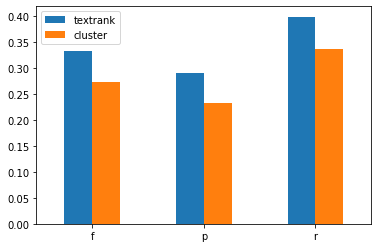

In [18]:
# compare results in bar chart
evaluation.get_barchart(tr_overall, cl_overall, "rouge-1")